In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Reading the data
ratings_data = pd.read_csv(r"C:\Users\91939\Downloads\ratings.csv.zip")
movies_data = pd.read_csv(r"C:\Users\91939\Downloads\movies.csv")

# Exploring the data
print(ratings_data.head())
print(movies_data.head())

# Merging the data
movie_ratings_data = pd.merge(ratings_data, movies_data, on='movieId')

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [3]:
# Creating user-item matrix
user_item_matrix = movie_ratings_data.pivot_table(index='userId', columns='title', values='rating')

# Performing matrix factorization using SGD
k = 50
epochs = 100
gamma = 0.01
lmbda = 0.1

num_users, num_items = user_item_matrix.shape
user_embedding = tf.Variable(tf.random.normal([num_users, k], 0.0, 0.1), name='user_embedding')
item_embedding = tf.Variable(tf.random.normal([num_items, k], 0.0, 0.1), name='item_embedding')

In [5]:
# Define the matrix factorization model
def matrix_factorization_sgd(user_movie_ratings, num_factors, lambda_val, num_epochs, learning_rate):
    num_users, num_movies = user_movie_ratings.shape
    user_matrix = np.random.normal(scale=1.0/num_factors, size=(num_users, num_factors))
    movie_matrix = np.random.normal(scale=1.0/num_factors, size=(num_movies, num_factors))
    for epoch in range(num_epochs):
        for user in range(num_users):
            for movie in range(num_movies):
                if user_movie_ratings[user, movie] > 0:
                    error = user_movie_ratings[user, movie] - np.dot(user_matrix[user], movie_matrix[movie])
                    user_matrix[user] += learning_rate * (error * movie_matrix[movie] - lambda_val * user_matrix[user])
                    movie_matrix[movie] += learning_rate * (error * user_matrix[user] - lambda_val * movie_matrix[movie])
    return user_matrix, movie_matrix

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 610 samples in 0.001s...
[t-SNE] Computed neighbors for 610 samples in 0.449s...
[t-SNE] Computed conditional probabilities for sample 610 / 610
[t-SNE] Mean sigma: 0.236117
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.773056
[t-SNE] KL divergence after 300 iterations: 2.119937
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9719 samples in 0.001s...
[t-SNE] Computed neighbors for 9719 samples in 1.065s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9719
[t-SNE] Computed conditional probabilities for sample 2000 / 9719
[t-SNE] Computed conditional probabilities for sample 3000 / 9719
[t-SNE] Computed conditional probabilities for sample 4000 / 9719
[t-SNE] Computed conditional probabilities for sample 5000 / 9719
[t-SNE] Computed conditional probabilities for sample 6000 / 9719
[t-SNE] Computed conditional probabilities for sample 7000 / 9719
[t-SNE] Computed conditional pro

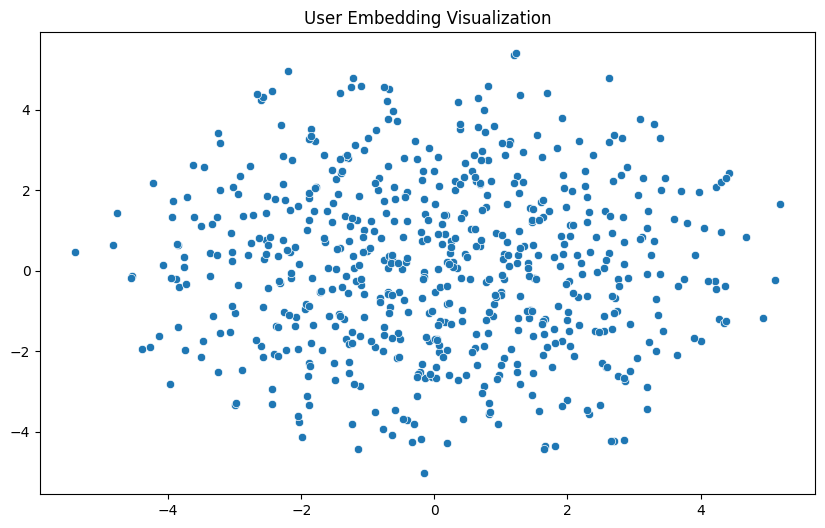

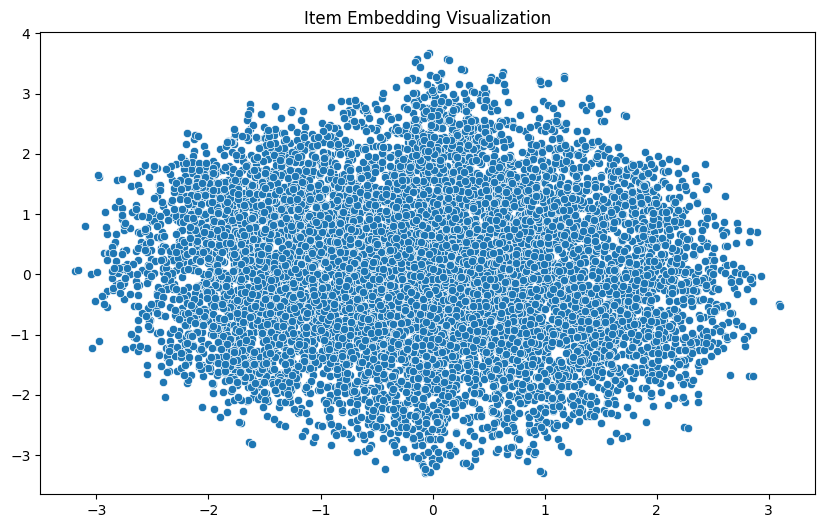

In [6]:
# Embedding Visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_user_embedding = tsne.fit_transform(user_embedding.numpy())
tsne_item_embedding = tsne.fit_transform(item_embedding.numpy())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_user_embedding[:, 0], y=tsne_user_embedding[:, 1])
plt.title('User Embedding Visualization')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_item_embedding[:, 0], y=tsne_item_embedding[:, 1])
plt.title('Item Embedding Visualization')
plt.show()

In [36]:
# Regularization in Matrix Factorization
lmbda = 0.1
def regularized_matrix_factorization_SGD(user_item_matrix, user_embedding, item_embedding, epochs, gamma, lmbda):
    for epoch in range(epochs):
        for user in range(num_users):
            for item in range(num_items):
                if not np.isnan(user_item_matrix.iloc[user, item]):
                    error = user_item_matrix.iloc[user, item] - tf.tensordot(user_embedding[user], item_embedding[item], axes=1)
                    user_embedding[user] += gamma * (error * item_embedding[item] - lmbda * user_embedding[user])
                    item_embedding[item] += gamma * (error * user_embedding[user] - lmbda * item_embedding[item])

regularized_matrix_factorization_SGD

n_latent_factors = 3

movie_input = Input(shape=[1], name="Movie-Input")
movie_embedding = Embedding(n_movies + 1, n_latent_factors, name="Movie-Embedding", embeddings_regularizer='l2')(movie_input)
movie_vec = Flatten(name="Flatten-Movies")(movie_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users + 1, n_latent_factors, name="User-Embedding", embeddings_regularizer='l2')(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

concat = Dot(name="Dot-Product", axes=1)([movie_vec, user_vec])
dense_1 = Dense(128, activation='relu')(concat)
dense_2 = Dense(64, activation='relu')(dense_1)
dense_3 = Dense(1, activation='relu')(dense_2)
# Calculate the predicted ratings
R_pred = np.dot(P,Q.T)

# Print the predicted ratings for user 1
print(R_pred[0,:])

[-0.00649664  0.00488879  0.01094575 ... -0.00819305  0.00595631
  0.00355649]
